## Problem Description

### A finance company wants to promote their new topup loan scheme to the current customers. For that they want to know the valuable costumers for this scheme. By the the given historical data we have build machine learnig models which are useful to predict whether the costumer opt the topup loan or not. 

In [1]:
#Importing the required libraries to read the data, data vizualizations, mathematical operations
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Mounting the drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the given datasets
train=pd.read_excel('/content/drive/MyDrive/capstone/Topuploan_train_test(Final).xlsx',sheet_name='Train')
test = pd.read_excel('/content/drive/MyDrive/capstone/Topuploan_train_test(Final).xlsx',sheet_name='Test')
asset = pd.read_excel('/content/drive/MyDrive/capstone/Asset_CustomerDemo.xlsx',sheet_name='Assest details')
cust_demo = pd.read_excel('/content/drive/MyDrive/capstone/Asset_CustomerDemo.xlsx',sheet_name='CustomerDemo')

In [4]:
merge1_testdata = pd.merge(test, cust_demo, left_on='Customer ID', right_on='ID')

In [5]:
final_test = pd.merge(merge1_testdata,asset,on='AssetID')

In [6]:
final_test.shape

(25675, 27)

In [7]:
print('shape of train_dataset : ',train.shape)
print('shape of test_dataset : ',test.shape)
print('shape of asset_dataset : ',asset.shape)
print('shape of customer_demo_dataset : ',cust_demo.shape)

shape of train_dataset :  (69997, 17)
shape of test_dataset :  (25675, 17)
shape of asset_dataset :  (128655, 4)
shape of customer_demo_dataset :  (128655, 7)


## Each dataset has different shape.So they have to merge with proper technique.

In [8]:
merge1 = pd.merge(train, cust_demo, left_on='Customer ID', right_on='ID') # Merging(Inner_merge) the train & CustomerDemo datasets on Customer_ID and ID 

In [9]:
df = pd.merge(merge1,asset,on='AssetID') # Merging(Inner merge) the merge1 and assest datasets on AssetID. This is the final dataset

In [10]:
print('shape of the merged dataset : ',df.shape)

shape of the merged dataset :  (69997, 27)


In [11]:
df.columns

Index(['Customer ID', 'Frequency', 'InstlmentMode', 'LoanStatus',
       'PaymentMode', 'BranchID', 'Area', 'Tenure', 'AmountFinance',
       'DisbursalAmount', 'AssetID', 'EMI', 'DisbursalDate', 'MaturityDAte',
       'AuthDate', 'LTV', 'Top-up ?', 'ID', 'SEX', 'AGE', 'MonthlyIncome',
       'City', 'State', 'ZiPCODE', 'AssetCost', 'ManufacturerID',
       'SupplierID'],
      dtype='object')

In [12]:
df.drop(['ID','Customer ID','AssetID','ZiPCODE','SupplierID'],axis=1,inplace=True) # Dropping the ID columns in train data

In [13]:
final_test.drop(['ID','Customer ID','AssetID','ZiPCODE','SupplierID'],axis=1,inplace=True) # Droping the Id colunms in test data

In [14]:
df.shape

(69997, 22)

In [15]:
final_test.shape

(25675, 22)

In [16]:
df.head().T # Displaying the first 5 rows 

,0,1,2,3,4
Frequency,Quatrly,Half Yearly,Half Yearly,Quatrly,Monthly
InstlmentMode,Arrear,Arrear,Arrear,Arrear,Arrear
LoanStatus,Active,Active,Closed,Closed,Closed
PaymentMode,Direct Debit,ECS,Direct Debit,PDC,Billed
BranchID,272,326,292,412,76
Area,LUCKNOW,MANDSAUR,BARODA,KANPUR,RAIPUR
Tenure,53,60,48,12,50
AmountFinance,375000.0,503352.0,280000.0,100000.0,350000.0
DisbursalAmount,375000.0,503352.0,280000.0,100000.0,350000.0
EMI,32100.0,74200.0,48000.0,27600.0,98000.0


##Feature Engneering

In [17]:
df['Disbursal_month'] = df['DisbursalDate'].dt.month # Extracting the month column from DisbursalDate in train data

In [18]:
df['Maturity_month']=df['MaturityDAte'].dt.month # Extracting the month columnn from MaturityDate in train data

In [19]:
df.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AmountFinance,DisbursalAmount,EMI,...,Top-up ?,SEX,AGE,MonthlyIncome,City,State,AssetCost,ManufacturerID,Disbursal_month,Maturity_month
0,Quatrly,Arrear,Active,Direct Debit,272,LUCKNOW,53,375000.0,375000.0,32100.0,...,Topup-opted,M,29.0,58333.33,SITAPUR,UTTAR PRADESH,450000,1568,11,4.0
1,Half Yearly,Arrear,Active,ECS,326,MANDSAUR,60,503352.0,503352.0,74200.0,...,Not-opted,M,34.0,35833.33,NEEMUCH,MADHYA PRADESH,530000,1568,2,12.0
2,Half Yearly,Arrear,Closed,Direct Debit,292,BARODA,48,280000.0,280000.0,48000.0,...,Not-opted,M,50.0,34166.67,KHEDA,GUJARAT,550000,1062,6,6.0
3,Quatrly,Arrear,Closed,PDC,412,KANPUR,12,100000.0,100000.0,27600.0,...,Not-opted,M,65.0,44416.67,FARRUKHABAD,UTTAR PRADESH,650000,1186,9,9.0
4,Monthly,Arrear,Closed,Billed,76,RAIPUR,50,350000.0,350000.0,98000.0,...,Not-opted,M,34.0,13333.33,DHAMTARI,CHATTISGARH,520000,1186,12,2.0


In [20]:
final_test['Disbursal_month'] = final_test['DisbursalDate'].dt.month # Extracting the month column from DisbursalDate in test data

In [21]:
final_test['Maturity_month']=final_test['MaturityDAte'].dt.month # Extracting the month columnn from MaturityDate in test data

In [22]:
final_test.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AmountFinance,DisbursalAmount,EMI,...,Top-up ?,SEX,AGE,MonthlyIncome,City,State,AssetCost,ManufacturerID,Disbursal_month,Maturity_month
0,Quatrly,Arrear,Active,ECS,202,LUCKNOW,36,300000.0,300000.0,34000.0,...,Not-opted,M,37.0,50775.00,ETAH,UTTAR PRADESH,600595,1046,12,12
1,Half Yearly,Arrear,Closed,PDC,125,GUNA,222,300000.0,300000.0,52700.0,...,Not-opted,M,51.0,33333.33,ASHOK NAGAR,MADHYA PRADESH,650000,1060,7,6
2,Half Yearly,Arrear,Active,ECS,375,REWARI,40,500278.0,500278.0,106519.0,...,Not-opted,M,39.0,176666.67,FARIDABAD,HARYANA,550000,1062,6,11
3,Half Yearly,Arrear,Active,Direct Debit,150,JABALPUR,68,480000.0,480000.0,22000.0,...,Topup-opted,M,46.0,19041.67,SATNA,MADHYA PRADESH,472000,1046,4,1
4,Half Yearly,Arrear,Closed,ECS,204,NaN,36,356529.0,356529.0,74230.0,...,Topup-opted,M,57.0,41666.67,PALI,RAJASTHAN,570000,1046,8,6


# EDA

In [23]:
# Listing the numerical,categorical and datetype columns 
num_att = ['Tenure','AmountFinance','DisbursalAmount','EMI','LTV','AGE','MonthlyIncome','AssetCost']
cat_att = ['Frequency','InstlmentMode','LoanStatus','PaymentMode','BranchID','SEX','ManufacturerID','Disbursal_month','Maturity_month','Top-up ?']
date = ['DisbursalDate','MaturityDAte','AuthDate']

In [24]:
df.drop(date,axis=1,inplace=True) # Droping the date columns in train data
final_test.drop(date,axis=1,inplace=True) # Droping the date columns in test data

In [25]:
df.dtypes

Frequency           object
InstlmentMode       object
LoanStatus          object
PaymentMode         object
BranchID             int64
Area                object
Tenure               int64
AmountFinance      float64
DisbursalAmount    float64
EMI                float64
LTV                float64
Top-up ?            object
SEX                 object
AGE                float64
MonthlyIncome      float64
City                object
State               object
AssetCost            int64
ManufacturerID       int64
Disbursal_month      int64
Maturity_month     float64
dtype: object

### Type Casting is required as some features are recognised as "object" datatype and ID Features are recognized as "int" datatype


In [26]:
df[cat_att]=df[cat_att].astype('category') # Coverting to appropriate data types  in train data

In [27]:
final_test[cat_att]=final_test[cat_att].astype('category') # Coverting to appropriate data types in test data

In [28]:
df.dtypes

Frequency          category
InstlmentMode      category
LoanStatus         category
PaymentMode        category
BranchID           category
Area                 object
Tenure                int64
AmountFinance       float64
DisbursalAmount     float64
EMI                 float64
LTV                 float64
Top-up ?           category
SEX                category
AGE                 float64
MonthlyIncome       float64
City                 object
State                object
AssetCost             int64
ManufacturerID     category
Disbursal_month    category
Maturity_month     category
dtype: object

In [29]:
# Clubbing the similar categories as a single catogery in train data
df['PaymentMode'].replace("PDC", 'Cheque',inplace = True) # PDC stands for Post-Dated Cheque
df['PaymentMode'].replace("PDC_E", 'Cheque',inplace = True) #  PDC_E might represent Post-Dated Cheque Encashed
df['PaymentMode'].replace("PDC Reject", 'Cheque',inplace = True) # PDC_reject indicates the rejection of post-dated cheques
df['PaymentMode'].replace("ECS Reject", 'ECS',inplace = True) # ECS_Reject represents the rejection of an ECS transaction

In [30]:
# Similarly clubbing the similar categories as a single catogery in test data
final_test['PaymentMode'].replace("PDC", 'Cheque',inplace = True)
final_test['PaymentMode'].replace("PDC_E", 'Cheque',inplace = True)
final_test['PaymentMode'].replace("PDC Reject", 'Cheque',inplace = True)
final_test['PaymentMode'].replace("ECS Reject", 'ECS',inplace = True)

In [31]:
df.describe()

,Tenure,AmountFinance,DisbursalAmount,EMI,LTV,AGE,MonthlyIncome,AssetCost
count,69997.000000,6.999700e+04,6.999700e+04,69997.000000,69997.000000,69981.000000,6.987000e+04,6.999700e+04
mean,43.232981,3.374415e+05,3.369724e+05,50763.865483,58.896453,39.959503,5.171740e+04,5.496028e+05
std,26.618412,1.037650e+05,1.034112e+05,28585.043744,15.840288,11.561177,2.336861e+06,1.035599e+05
min,6.000000,5.000000e+04,4.063000e+03,0.000000,-1.380000,18.000000,0.000000e+00,2.000000e+05
25%,35.000000,2.700000e+05,2.699000e+05,30000.000000,48.760000,31.000000,2.500000e+04,4.900000e+05
50%,36.000000,3.400000e+05,3.400000e+05,51900.000000,60.750000,39.000000,3.333333e+04,5.500000e+05
75%,48.000000,4.000000e+05,4.000000e+05,69097.000000,70.420000,48.000000,4.800000e+04,6.150000e+05
max,501.000000,1.300000e+06,1.300000e+06,450000.000000,100.000000,90.000000,6.174775e+08,1.825000e+06


In [32]:
df.describe(include='category')

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Top-up ?,SEX,ManufacturerID,Disbursal_month,Maturity_month
count,69997,69997,69997,69997,69997,69997,69981,69997,69997,69996.0
unique,4,2,2,7,153,2,2,9,12,12.0
top,Half Yearly,Arrear,Closed,Cheque,24,Not-opted,M,1186,6,6.0
freq,37168,66577,52027,23247,3268,59999,67557,13999,8458,14531.0


In [33]:
df['InstlmentMode'].value_counts(normalize=100)*100

Arrear     95.114076
Advance     4.885924
Name: InstlmentMode, dtype: float64

## Observations

* The target variable(Top up ?) is highly imbalanced we have to balance it while modeling or before modeling.

* Female representatives are very low compared to male representetives.

* The installment arrears are very high (95.11%).

* There are some instances with Monthly Income as "0" and EMI with "0" which needed to be further checked

* comparatively more Maturity and Disbursals are happen in june month.

* Most of the Customers have opted for Half-yearly payment with Arrear type of EMIs

* Numerical columns need to be standardize and categorical columns should be encoded with proper encoding techniques.

* The mean of AGE and Tenure columns are 43.2 and 39.9 but the max values are very large it seems there outliers we need to process furtherly by avoiding the outliers or using some other techniques.

<Axes: xlabel='Top-up ?', ylabel='count'>

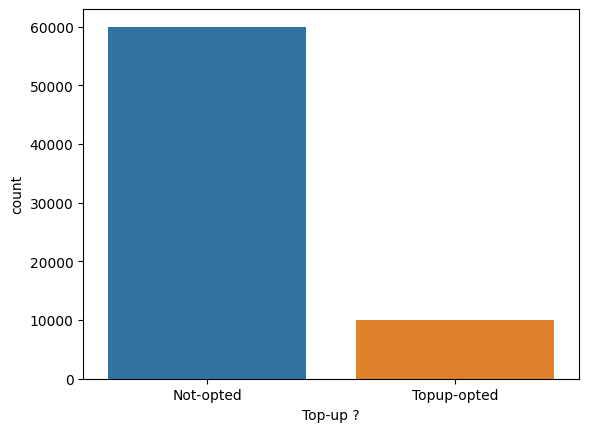

In [34]:
sns.countplot(x=df['Top-up ?'])

## Target variable is highly imbalanced with Not-opted percent 85.8% and Topup-opted percent 14.2%. It should be balanced by sampling in data level or use class_weight in model level.

In [35]:
import warnings
warnings.filterwarnings("ignore")

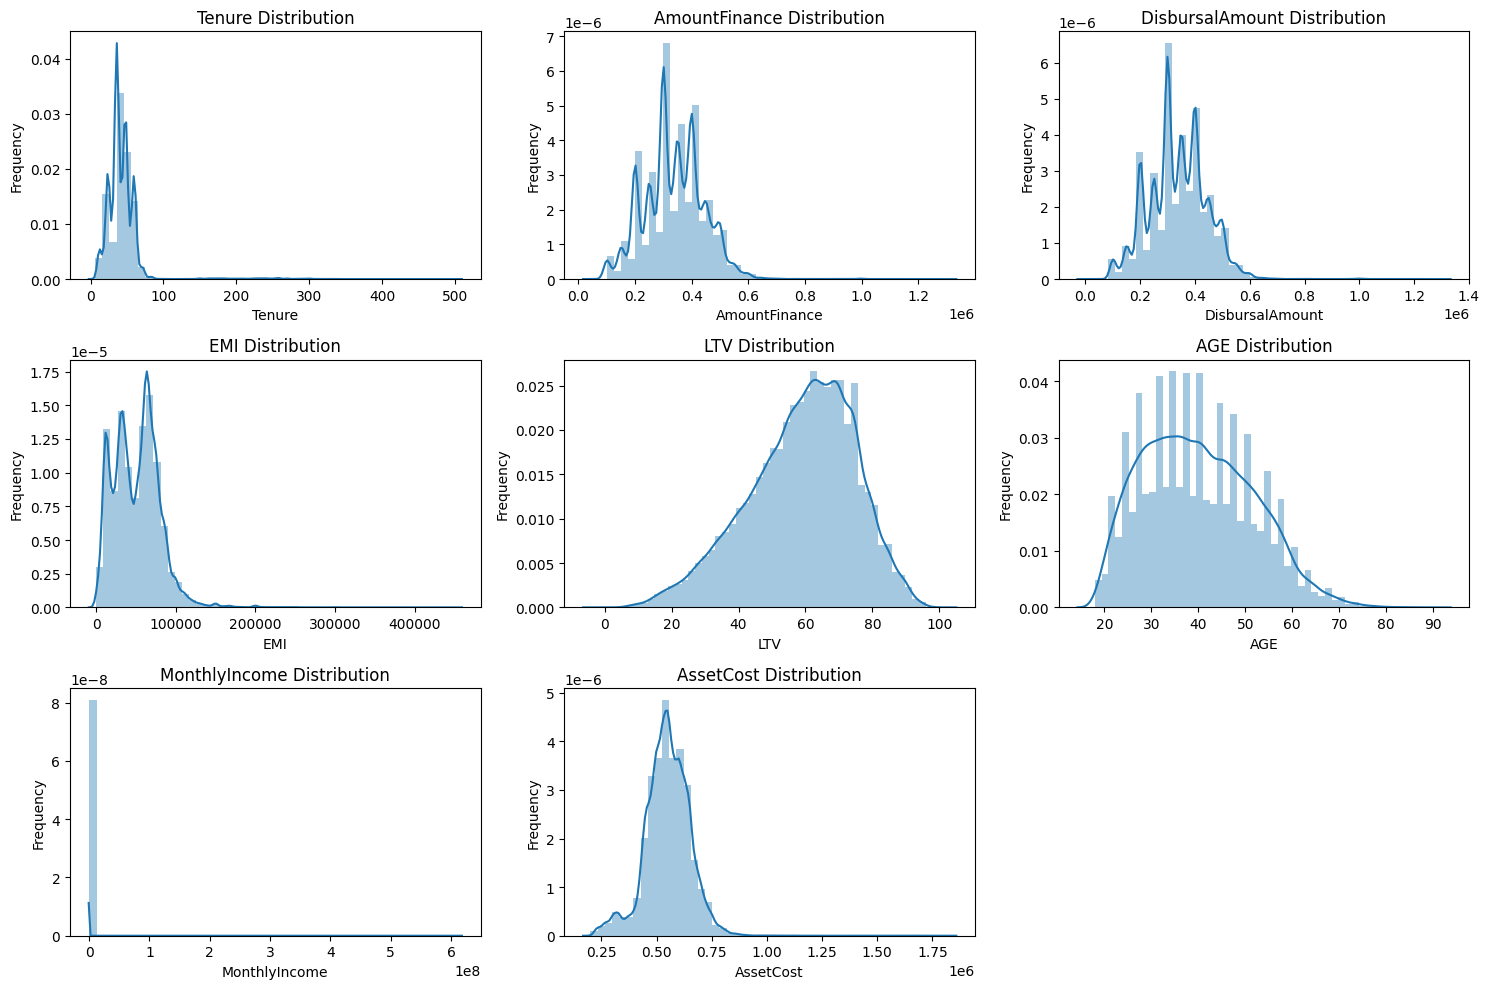

In [36]:
fig=plt.figure(figsize = (15,10))

for i in range(len(num_att)):
  fig.add_subplot(3,3,i+1)
  sns.distplot(df[num_att[i]],hist=True,kde=True)
  #df[num_att[i]].plot(kind='density')
  plt.title(num_att[i]+' '+'Distribution')
  plt.xlabel(num_att[i])
  plt.ylabel('Frequency')
fig.tight_layout() 
plt.show()

In [37]:
df[df['EMI']==0] 

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AmountFinance,DisbursalAmount,EMI,...,Top-up ?,SEX,AGE,MonthlyIncome,City,State,AssetCost,ManufacturerID,Disbursal_month,Maturity_month
28261,Monthly,Arrear,Closed,Billed,263,MANDSAUR,45,400000.0,400000.0,0.0,...,Not-opted,M,43.0,41666.67,MANDSAUR,MADHYA PRADESH,557000,1062,3,NaN


##  EMI column has one '0' and aslo there is null value in maturity_month in this row.

In [38]:
df.drop(28261,axis=0,inplace=True) # Droping the row

Text(0.5, 1.0, 'Correlation Heatmap for numerical variables')

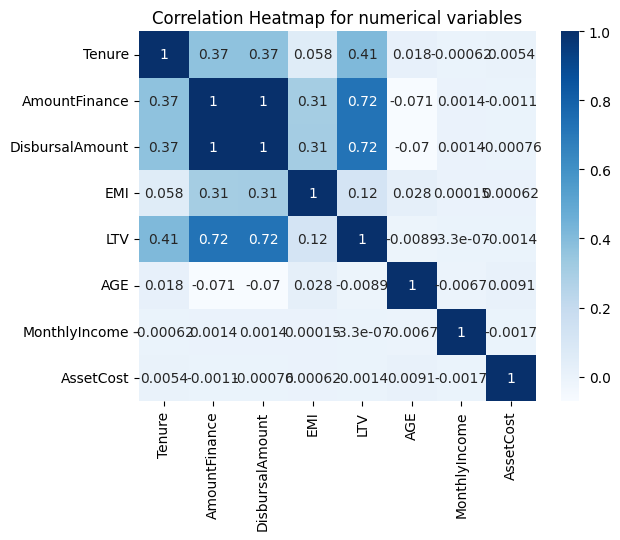

In [39]:
corr = df[num_att].corr()
sns.heatmap(corr, cmap="Blues", annot=True).set_title('Correlation Heatmap for numerical variables')

## Disbursal Amount and Amount Finance have good correlation. It is good to do regularization.

<Axes: xlabel='AGE', ylabel='Top-up ?'>

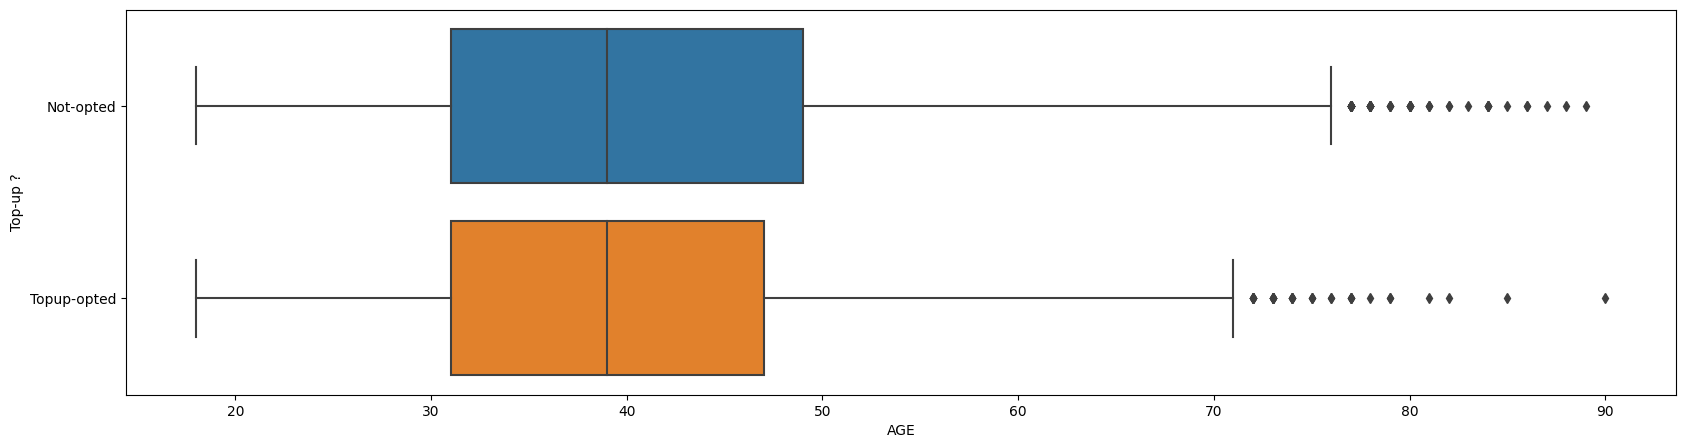

In [40]:
plt.figure(figsize = (20,5))
sns.boxplot(y=df['Top-up ?'],x=df['AGE'])

In [41]:
df[df['Top-up ?']=='Topup-opted']['AGE'].describe()

count    9996.000000
mean       39.776611
std        11.239367
min        18.000000
25%        31.000000
50%        39.000000
75%        47.000000
max        90.000000
Name: AGE, dtype: float64

## Topup-opted people are dense in the range of 31-47 age group.

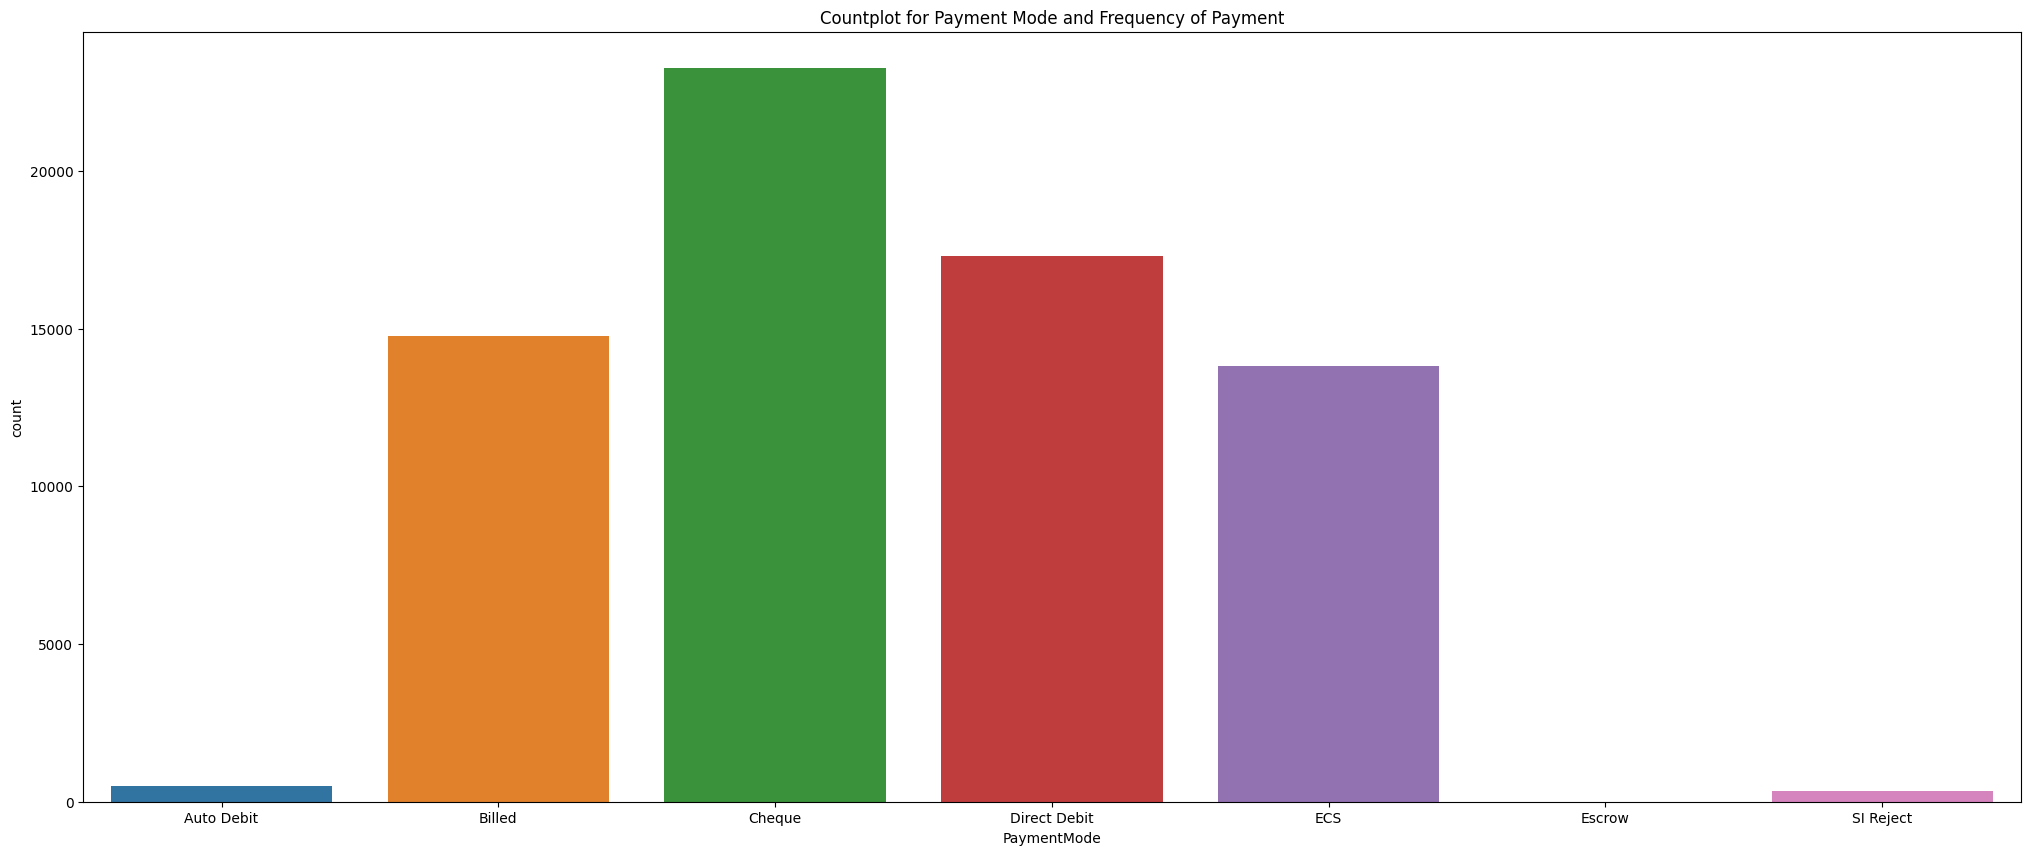

In [42]:
plt.figure(figsize=(25,10))
sns.countplot(x='PaymentMode',data=df)
plt.title('Countplot for Payment Mode and Frequency of Payment')
plt.show()

## Most most number of payments done through check.Payments through Auto Debit and SI Reject are very low and through Escrow is almost neglegible.

Text(0.5, 1.0, "Count of Customers availing top_up laon for these Manufacturer's Products")

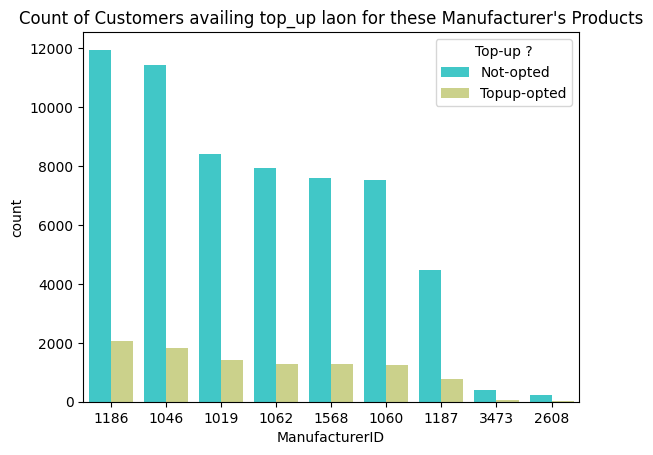

In [47]:
sns.countplot(x=df.ManufacturerID, palette='rainbow',hue=df['Top-up ?'],order=df['ManufacturerID'].value_counts().index)
plt.title("Count of Customers availing top_up laon for these Manufacturer's Products")

##  The products of manufacturerID 3473 and 2608 did not have much impact on the top_up loan opting by the customers.

<Axes: xlabel='Maturity_month', ylabel='count'>

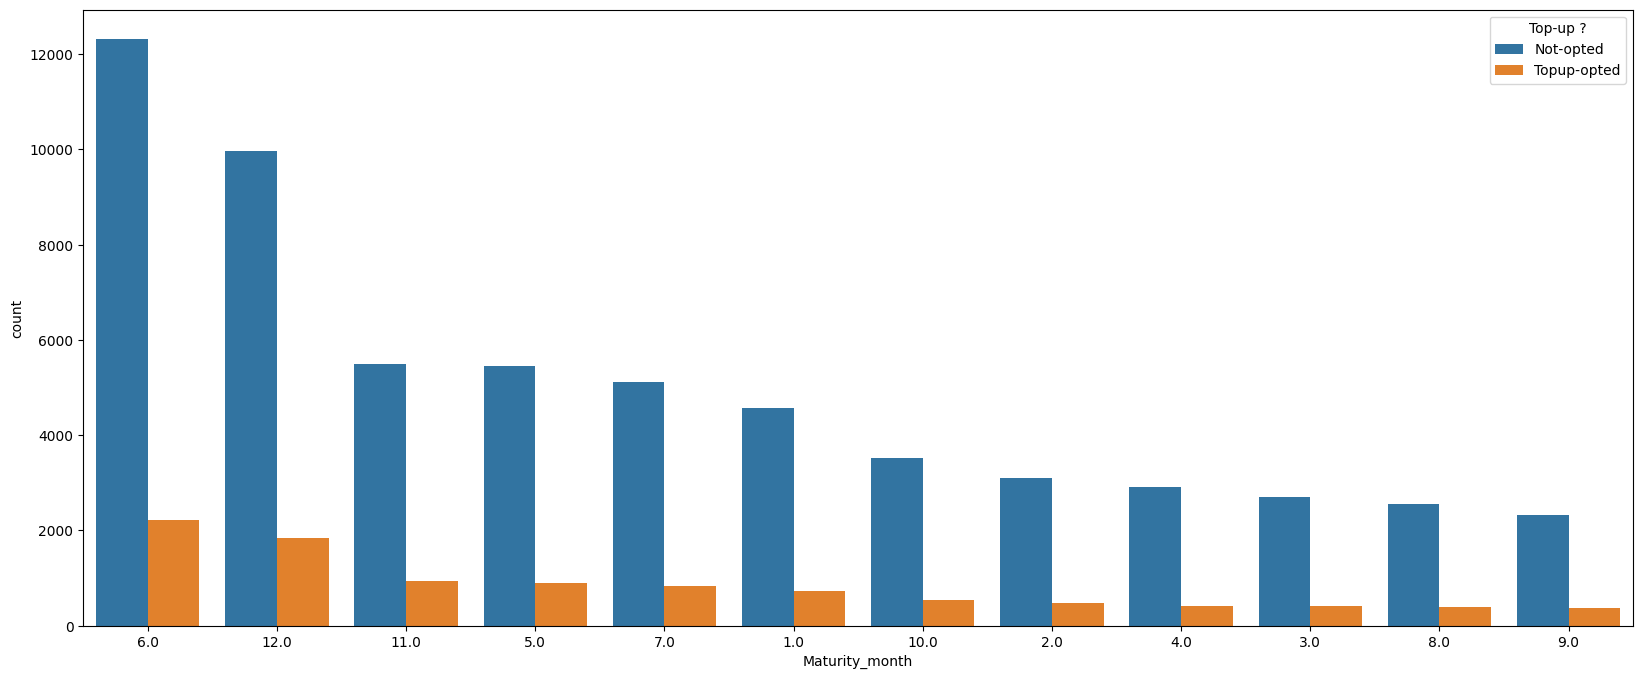

In [52]:
plt.figure(figsize = (20,8))
sns.countplot(x=df['Maturity_month'],hue = df['Top-up ?'],order = df['Maturity_month'].value_counts().index)

In [54]:
df['Maturity_month'].value_counts(normalize=True)*100

6.0     20.759758
12.0    16.848106
11.0     9.184811
5.0      9.053374
7.0      8.500486
1.0      7.566147
10.0     5.778902
2.0      5.087434
4.0      4.731699
3.0      4.431682
8.0      4.210241
9.0      3.847363
Name: Maturity_month, dtype: float64

In [53]:
df[df['Top-up ?']=='Topup-opted']['Maturity_month'].value_counts(normalize=True)*100

6.0     22.104421
12.0    18.363673
11.0     9.281856
5.0      8.861772
7.0      8.261652
1.0      7.341468
10.0     5.311062
2.0      4.680936
4.0      4.120824
3.0      4.050810
8.0      3.950790
9.0      3.670734
Name: Maturity_month, dtype: float64

## Nearly 60% of bussiness is happen in 5th,6th,11th and 12th months only.Almost Topup-loan opted customers also follows the same proportion.Comparatively in june highest bussiness(around 22%) is happening.

In [55]:
df[df['MonthlyIncome']==6.174775e+08]

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AmountFinance,DisbursalAmount,EMI,...,Top-up ?,SEX,AGE,MonthlyIncome,City,State,AssetCost,ManufacturerID,Disbursal_month,Maturity_month
42656,Quatrly,Arrear,Active,ECS,273,LUCKNOW,42,320000.0,320000.0,34600.0,...,Not-opted,M,20.0,617477500.0,MORADABAD,UTTAR PRADESH,498396,1568,1,7.0


In [56]:
df.drop(42656,axis=0,inplace=True)

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

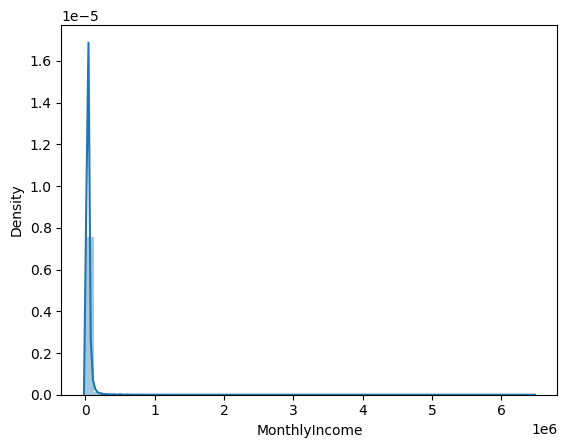

In [57]:
sns.distplot(df['MonthlyIncome'],hist=True,kde=True)

## Before the x-axis scale le8 after droping the record 42656 it comes le6.

In [58]:
df.rename(columns = {'Top-up ?':'Top_up'}, inplace = True)

In [59]:
final_test.rename(columns = {'Top-up ?':'Top_up'}, inplace = True)

In [60]:
df['Top_up'] = df['Top_up'].map({'Not-opted':0,'Topup-opted':1})

In [61]:
final_test['Top_up'] = final_test['Top_up'].map({'Not-opted':0,'Topup-opted':1})

In [62]:
df.nunique()

Frequency              4
InstlmentMode          2
LoanStatus             2
PaymentMode            7
BranchID             153
Area                  75
Tenure               137
AmountFinance      10769
DisbursalAmount    10011
EMI                13599
LTV                 7438
Top_up                 2
SEX                    2
AGE                   73
MonthlyIncome       8968
City                 403
State                 16
AssetCost           4849
ManufacturerID         9
Disbursal_month       12
Maturity_month        12
dtype: int64

In [63]:
df.isnull().sum() # Checking the null values

Frequency             0
InstlmentMode         0
LoanStatus            0
PaymentMode           0
BranchID              0
Area               8661
Tenure                0
AmountFinance         0
DisbursalAmount       0
EMI                   0
LTV                   0
Top_up                0
SEX                  16
AGE                  16
MonthlyIncome       127
City               6581
State                 0
AssetCost             0
ManufacturerID        0
Disbursal_month       0
Maturity_month        0
dtype: int64

In [64]:
df.duplicated().sum() # Checking for the duplicated values 

1

In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.duplicated().sum()

0

### There are no duplicated values.

In [67]:
df.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AmountFinance,DisbursalAmount,EMI,...,Top_up,SEX,AGE,MonthlyIncome,City,State,AssetCost,ManufacturerID,Disbursal_month,Maturity_month
0,Quatrly,Arrear,Active,Direct Debit,272,LUCKNOW,53,375000.0,375000.0,32100.0,...,1,M,29.0,58333.33,SITAPUR,UTTAR PRADESH,450000,1568,11,4.0
1,Half Yearly,Arrear,Active,ECS,326,MANDSAUR,60,503352.0,503352.0,74200.0,...,0,M,34.0,35833.33,NEEMUCH,MADHYA PRADESH,530000,1568,2,12.0
2,Half Yearly,Arrear,Closed,Direct Debit,292,BARODA,48,280000.0,280000.0,48000.0,...,0,M,50.0,34166.67,KHEDA,GUJARAT,550000,1062,6,6.0
3,Quatrly,Arrear,Closed,Cheque,412,KANPUR,12,100000.0,100000.0,27600.0,...,0,M,65.0,44416.67,FARRUKHABAD,UTTAR PRADESH,650000,1186,9,9.0
4,Monthly,Arrear,Closed,Billed,76,RAIPUR,50,350000.0,350000.0,98000.0,...,0,M,34.0,13333.33,DHAMTARI,CHATTISGARH,520000,1186,12,2.0


## Train-Test Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X=df.drop(['Top_up'],axis=1)
y=df['Top_up']
X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.25,random_state=123,stratify=y)

In [70]:
y_test=final_test['Top_up']
X_test=final_test.drop(['Top_up'],axis=1)

In [71]:
print(X_train.shape)
print(X_val.shape)

(52495, 20)
(17499, 20)


## Handling Null Values

### Function for imputing with state wise mode values

In [72]:
def impute_cities(data,col,ref_col):
  # Calculate mode of each city
  mode_by_state = {}
  
  # Iterate over each city
  for city,city_data in data.groupby(ref_col):
    non_null_areas = city_data[col].dropna() # Drop null values from the Area column
    if len(non_null_areas)>0:
      mode_value =non_null_areas.mode().iloc[0] # Calculate the mode for non-null values
      mode_by_state[city]=mode_value
  
  # Iterate over each row
  for index,row in data.iterrows():
    if pd.isnull(row[col]): # Check if Area is null
      city=row[ref_col]     # Get the corresponding city value
      if city in mode_by_state:
        mode_value=mode_by_state[city] # Get the mode value for that city
        data.at[index,col]=mode_value   # Replace the null value with the mode value

  return data

In [73]:
X_train=impute_cities(X_train,'City','State')
X_val=impute_cities(X_val,'City','State')
X_test=impute_cities(X_test,'City','State')

In [74]:
X_train.isnull().sum() 

Frequency             0
InstlmentMode         0
LoanStatus            0
PaymentMode           0
BranchID              0
Area               6498
Tenure                0
AmountFinance         0
DisbursalAmount       0
EMI                   0
LTV                   0
SEX                  12
AGE                  12
MonthlyIncome        91
City                  0
State                 0
AssetCost             0
ManufacturerID        0
Disbursal_month       0
Maturity_month        0
dtype: int64

In [75]:
X_val.isnull().sum()

Frequency             0
InstlmentMode         0
LoanStatus            0
PaymentMode           0
BranchID              0
Area               2163
Tenure                0
AmountFinance         0
DisbursalAmount       0
EMI                   0
LTV                   0
SEX                   4
AGE                   4
MonthlyIncome        36
City                  0
State                 0
AssetCost             0
ManufacturerID        0
Disbursal_month       0
Maturity_month        0
dtype: int64

## Imputation in numerical variables by using SimpleImputer with strategy='median'

In [76]:
from sklearn.impute import SimpleImputer

In [77]:
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(X_train[num_att])

SimpleImputer(strategy='median')

In [78]:
X_train[num_att]=num_imputer.transform(X_train[num_att])

In [79]:
X_train.isnull().sum()

Frequency             0
InstlmentMode         0
LoanStatus            0
PaymentMode           0
BranchID              0
Area               6498
Tenure                0
AmountFinance         0
DisbursalAmount       0
EMI                   0
LTV                   0
SEX                  12
AGE                   0
MonthlyIncome         0
City                  0
State                 0
AssetCost             0
ManufacturerID        0
Disbursal_month       0
Maturity_month        0
dtype: int64

In [80]:
X_val[num_att]=num_imputer.transform(X_val[num_att])

In [81]:
X_val.isnull().sum()

Frequency             0
InstlmentMode         0
LoanStatus            0
PaymentMode           0
BranchID              0
Area               2163
Tenure                0
AmountFinance         0
DisbursalAmount       0
EMI                   0
LTV                   0
SEX                   4
AGE                   0
MonthlyIncome         0
City                  0
State                 0
AssetCost             0
ManufacturerID        0
Disbursal_month       0
Maturity_month        0
dtype: int64

In [82]:
X_test[num_att]=num_imputer.transform(final_test[num_att])

In [83]:
X_test.isnull().sum()

Frequency             0
InstlmentMode         0
LoanStatus            0
PaymentMode           0
BranchID              0
Area               2964
Tenure                0
AmountFinance         0
DisbursalAmount       0
EMI                   0
LTV                   0
SEX                  13
AGE                   0
MonthlyIncome         0
City                  0
State                 0
AssetCost             0
ManufacturerID        0
Disbursal_month       0
Maturity_month        0
dtype: int64

In [84]:
X_train.drop(['Area','State'],axis=1,inplace=True)
X_val.drop(['Area','State'],axis=1,inplace=True)
X_test.drop(['Area','State'],axis=1,inplace=True)

## Imputing the remaining categorical variable by using SimpleImputer with strategy='most_frequent'

In [85]:
cat_cols = ['Frequency','InstlmentMode','LoanStatus','PaymentMode','BranchID','SEX','ManufacturerID','Disbursal_month','Maturity_month','City']

In [86]:
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(X_train[cat_cols])

SimpleImputer(strategy='most_frequent')

In [87]:
X_train[cat_cols]=cat_imputer.transform(X_train[cat_cols])

In [88]:
X_train.isnull().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AmountFinance      0
DisbursalAmount    0
EMI                0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
City               0
AssetCost          0
ManufacturerID     0
Disbursal_month    0
Maturity_month     0
dtype: int64

In [89]:
X_val[cat_cols]=cat_imputer.transform(X_val[cat_cols])

In [90]:
X_val.isnull().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AmountFinance      0
DisbursalAmount    0
EMI                0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
City               0
AssetCost          0
ManufacturerID     0
Disbursal_month    0
Maturity_month     0
dtype: int64

In [92]:
X_val.isna().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AmountFinance      0
DisbursalAmount    0
EMI                0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
City               0
AssetCost          0
ManufacturerID     0
Disbursal_month    0
Maturity_month     0
dtype: int64

In [93]:
X_test[cat_cols]=cat_imputer.transform(X_test[cat_cols])

In [94]:
X_test.isnull().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AmountFinance      0
DisbursalAmount    0
EMI                0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
City               0
AssetCost          0
ManufacturerID     0
Disbursal_month    0
Maturity_month     0
dtype: int64

## Encoding

In [95]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


## For target encoding target variable should be not category dtype.so changing the datatype to 'object'

In [96]:
y_train = y_train.astype('object')
y_val = y_val.astype('object')
y_test=y_test.astype('object')

## Some columns like City,BranchId has more number of categories.So here Encoding with target encoder.

In [97]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols],y_train)
X_val[cat_cols] = encoder.transform(X_val[cat_cols],y_val)
X_test[cat_cols]=encoder.transform(X_test[cat_cols],y_test)

## Scaling

## Standardaizing the numerical columns

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_att]=scaler.fit_transform(X_train[num_att])
X_val[num_att]=scaler.transform(X_val[num_att])
X_test[num_att]=scaler.transform(X_test[num_att])

## For applying the model target variable should have category datatype.So again converting into dtype category

In [99]:
y_train=y_train.astype('category')
y_val=y_val.astype('category')
y_test=y_test.astype('category')

## Model Building 

## For this problem the important metrics is the Recall

## Logistic Regression(With L1(Lasso) Regularization)

In [100]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression(penalty='l1',solver='saga',class_weight='balanced')
logistic_model.fit(X_train,y_train)

#Predictions

logit_train_preds=logistic_model.predict(X_train)
logit_val_preds=logistic_model.predict(X_val)

In [101]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

In [102]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))
    print("F1_score : ",f1_score(act,pred))

In [104]:
print('---------Train-----------')
evaluate_model(y_train,logit_train_preds)

print('--------Validation---------')
evaluate_model(y_val,logit_val_preds)


---------Train-----------
Confusion Matrix 
 [[27700 17297]
 [ 2848  4650]]
Accurcay :  0.616249166587294
Recall   :  0.6201653774339824
Precision:  0.21187406023602315
F1_score :  0.31584309730005095
--------Validation---------
Confusion Matrix 
 [[9131 5868]
 [1022 1478]]
Accurcay :  0.6062632150408594
Recall   :  0.5912
Precision:  0.2011979308467193
F1_score :  0.30022344099126547


## Random Forest

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=123, n_estimators=100,class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=123)

In [107]:
train_pred=clf.predict(X_train)
val_preds=clf.predict(X_val)

In [108]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_val,val_preds)

--Train--
Confusion Matrix 
 [[44997     0]
 [    0  7498]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1_score :  1.0
--Test--
Confusion Matrix 
 [[14982    17]
 [ 2488    12]]
Accurcay :  0.8568489627978741
Recall   :  0.0048
Precision:  0.41379310344827586
F1_score :  0.009489916963226569


## Hyper parameter tuning

In [109]:
param_grid = {"n_estimators" : [50, 100], 
              "max_depth" : [1,5],
              "max_features" : [3, 5],
              "min_samples_leaf" : [1, 2, 4], 
              'criterion':['gini','entropy']}

In [110]:
clf_grid = GridSearchCV(clf,param_grid,cv=5)

In [111]:
clf_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=123),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 5],
                         'max_features': [3, 5], 'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]})

In [112]:
clf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 4,
 'n_estimators': 50}

In [113]:
train_pred = clf_grid.predict(X_train)
val_pred = clf_grid.predict(X_val)

In [114]:
print("-------Train------")
evaluate_model(y_train,train_pred)
print("-----Validation-----")
evaluate_model(y_val,val_pred)

-------Train------
Confusion Matrix 
 [[27680 17317]
 [ 2637  4861]]
Accurcay :  0.6198876083436518
Recall   :  0.6483062149906642
Precision:  0.2191811705293534
F1_score :  0.32760479849036256
-----Validation-----
Confusion Matrix 
 [[9048 5951]
 [1005 1495]]
Accurcay :  0.6024915709469113
Recall   :  0.598
Precision:  0.20077894171367178
F1_score :  0.30062336617735774


## SVM

In [115]:
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear',C=1,class_weight='balanced')
linear_svm.fit(X_train,y_train)

#predictions
train_preds = linear_svm.predict(X_train)
val_preds = linear_svm.predict(X_val)

In [116]:
print("-------Train------")
evaluate_model(y_train,train_preds)
print("-----Validation-----")
evaluate_model(y_val,val_preds)

-------Train------
Confusion Matrix 
 [[27598 17399]
 [ 2793  4705]]
Accurcay :  0.6153538432231641
Recall   :  0.6275006668444919
Precision:  0.2128574013753167
F1_score :  0.31788392676170535
-----Validation-----
Confusion Matrix 
 [[9139 5860]
 [1010 1490]]
Accurcay :  0.6074061374935711
Recall   :  0.596
Precision:  0.20272108843537415
F1_score :  0.30253807106598984


## XGBoost

In [117]:
from xgboost import XGBClassifier
from sklearn.utils import compute_sample_weight
weights = compute_sample_weight('balanced',y_train)
clf_xgb = XGBClassifier(scale_pos_weight=6)
clf_xgb.fit(X_train, y_train,sample_weight=weights)

pred_train = clf_xgb.predict(X_train)
pred_val = clf_xgb.predict(X_val)

In [118]:
print("-------Train------")
evaluate_model(y_train,pred_train)
print("-----Validation-----")
evaluate_model(y_val,pred_val)

-------Train------
Confusion Matrix 
 [[12393 32604]
 [    0  7498]]
Accurcay :  0.37891227735974853
Recall   :  1.0
Precision:  0.18697321829335195
F1_score :  0.3150420168067227
-----Validation-----
Confusion Matrix 
 [[ 3504 11495]
 [  322  2178]]
Accurcay :  0.32470426881536085
Recall   :  0.8712
Precision:  0.1592920353982301
F1_score :  0.26933778519755147


## Hyper Parametric Tuning

In [119]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
    'colsample_bytree': np.linspace(0.6, 0.8,2),
    'n_estimators': [50, 100,150],
    'max_depth': [5, 6,7]}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3)

In [120]:
CV_XGB.fit(X=X_train, y=y_train,sample_weight=weights)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...in=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': array([0.6, 0.8]),
                         'max_depth': [5, 6, 7],
                         'n_estimators': [50, 100, 150]})

In [121]:
best_xgb_model = CV_XGB.best_estimator_

In [122]:
print(CV_XGB.best_score_, CV_XGB.best_params_)

0.7506430343118867 {'colsample_bytree': 0.8, 'max_depth': 7, 'n_estimators': 150}


In [123]:
best_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [124]:
pred_train = best_xgb_model.predict(X_train)
pred_val = best_xgb_model.predict(X_val)

In [125]:
print("-------Train------")
evaluate_model(y_train,pred_train)
print("-----Validation-----")
evaluate_model(y_val,pred_val)

-------Train------
Confusion Matrix 
 [[38806  6191]
 [  520  6978]]
Accurcay :  0.8721592532622154
Recall   :  0.9306481728460922
Precision:  0.5298807806211557
F1_score :  0.6752794309769198
-----Validation-----
Confusion Matrix 
 [[11600  3399]
 [ 1571   929]]
Accurcay :  0.7159837705011715
Recall   :  0.3716
Precision:  0.21464879852125693
F1_score :  0.27211482132396014


## Stacking

In [126]:
from sklearn.ensemble import VotingClassifier

In [127]:
voting_clf = VotingClassifier(estimators=[('clf_LR', logistic_model), ('clf_RF', clf_grid), ('clf_svm', linear_svm)])

In [128]:
voting_clf

VotingClassifier(estimators=[('clf_LR',
                              LogisticRegression(class_weight='balanced',
                                                 penalty='l1', solver='saga')),
                             ('clf_RF',
                              GridSearchCV(cv=5,
                                           estimator=RandomForestClassifier(class_weight='balanced',
                                                                            random_state=123),
                                           param_grid={'criterion': ['gini',
                                                                     'entropy'],
                                                       'max_depth': [1, 5],
                                                       'max_features': [3, 5],
                                                       'min_samples_leaf': [1,
                                                                            2,
                                                                            4],
                                                       'n_estimators': [50,
                                                                        100]})),
                             ('clf_svm',
                              SVC(C=1, class_weight='balanced',
                                  kernel='linear'))])

In [129]:
voting_clf.fit(X_train,y_train) 

VotingClassifier(estimators=[('clf_LR',
                              LogisticRegression(class_weight='balanced',
                                                 penalty='l1', solver='saga')),
                             ('clf_RF',
                              GridSearchCV(cv=5,
                                           estimator=RandomForestClassifier(class_weight='balanced',
                                                                            random_state=123),
                                           param_grid={'criterion': ['gini',
                                                                     'entropy'],
                                                       'max_depth': [1, 5],
                                                       'max_features': [3, 5],
                                                       'min_samples_leaf': [1,
                                                                            2,
                                                                            4],
                                                       'n_estimators': [50,
                                                                        100]})),
                             ('clf_svm',
                              SVC(C=1, class_weight='balanced',
                                  kernel='linear'))])

In [130]:
stack_preds_train = voting_clf.predict(X_train)

In [131]:
stack_preds_val = voting_clf.predict(X_val)

In [132]:
print("-------Train------")
evaluate_model(y_train,stack_preds_train)
print("-----Validation-----")
evaluate_model(y_val,stack_preds_val)

-------Train------
Confusion Matrix 
 [[27365 17632]
 [ 2706  4792]]
Accurcay :  0.6125726259643776
Recall   :  0.6391037610029341
Precision:  0.213699607563325
F1_score :  0.32029944522424975
-----Validation-----
Confusion Matrix 
 [[9000 5999]
 [1000 1500]]
Accurcay :  0.6000342876735814
Recall   :  0.6
Precision:  0.20002667022269635
F1_score :  0.3000300030003


## Applying on Test

## Logistic Regression

In [133]:
#train_pred = clf_grid.predict(X_train)
logit_test_preds=logistic_model.predict(X_test)

In [134]:
print("-------Train------")
evaluate_model(y_train,logit_train_preds)
print("-------Test-------")
evaluate_model(y_test,logit_test_preds)

-------Train------
Confusion Matrix 
 [[27700 17297]
 [ 2848  4650]]
Accurcay :  0.616249166587294
Recall   :  0.6201653774339824
Precision:  0.21187406023602315
F1_score :  0.31584309730005095
-------Test-------
Confusion Matrix 
 [[13311  8128]
 [ 1875  2361]]
Accurcay :  0.6103992210321324
Recall   :  0.5573654390934845
Precision:  0.22509295452378683
F1_score :  0.32067911714770797


## Random Forest

In [137]:
test_preds = clf_grid.predict(X_test)

In [138]:
print("-------Train------")
evaluate_model(y_train,train_pred)
print("-------Test-------")
evaluate_model(y_test,test_preds)

-------Train------
Confusion Matrix 
 [[27680 17317]
 [ 2637  4861]]
Accurcay :  0.6198876083436518
Recall   :  0.6483062149906642
Precision:  0.2191811705293534
F1_score :  0.32760479849036256
-------Test-------
Confusion Matrix 
 [[13210  8229]
 [ 1672  2564]]
Accurcay :  0.6143719571567673
Recall   :  0.6052880075542965
Precision:  0.23756138237746688
F1_score :  0.34120699980038594


#Stacking

In [139]:
stack_preds_test = voting_clf.predict(X_test)

In [140]:
print("-------Train------")
evaluate_model(y_train,stack_preds_train)
print("-------Test-------")
evaluate_model(y_test,stack_preds_test)

-------Train------
Confusion Matrix 
 [[27365 17632]
 [ 2706  4792]]
Accurcay :  0.6125726259643776
Recall   :  0.6391037610029341
Precision:  0.213699607563325
F1_score :  0.32029944522424975
-------Test-------
Confusion Matrix 
 [[13114  8325]
 [ 1729  2507]]
Accurcay :  0.608412852969815
Recall   :  0.5918319169027384
Precision:  0.23144387001477104
F1_score :  0.3327581629944253


# Thank you...